## 02 EDA- word counts

In [36]:
# imports and libraries

import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

pd.options.display.max_colwidth = 400

In [37]:
# seaborn styling
import seaborn as sns

sns.set_context('talk') # size of text/graph elements
sns.set_style('whitegrid') # background of chart color and if grid is present

### pickle in witcher3_5000, netflixwitcher_5000 dfs and format

In [38]:
# pickle in witcher3_5000 dataframe
with open('dataframes/witcher3_5000.pkl', mode= 'rb') as pickle_in: 
    witcher3_5000= pickle.load(pickle_in)

witcher3_5000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4966 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   subreddit     4966 non-null   object 
 1   title         4966 non-null   object 
 2   selftext      4966 non-null   object 
 3   score         4966 non-null   int64  
 4   upvote_ratio  4966 non-null   float64
 5   num_comments  4966 non-null   int64  
 6   created_utc   4966 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 310.4+ KB


In [39]:
# pickle in netflixwitcher_5000 dataframe
with open('dataframes/netflixwitcher_5000.pkl', mode= 'rb') as pickle_in: 
    netflixwitcher_5000= pickle.load(pickle_in)
    
netflixwitcher_5000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4815 entries, 0 to 4994
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   subreddit     4815 non-null   object 
 1   title         4815 non-null   object 
 2   selftext      4815 non-null   object 
 3   score         4815 non-null   int64  
 4   upvote_ratio  4815 non-null   float64
 5   num_comments  4815 non-null   int64  
 6   created_utc   4815 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 300.9+ KB


In [40]:
# drop index so range is reflective of current total rows, not out of 5000 with removed rows
witcher3_5000.reset_index(drop= True, inplace= True)
netflixwitcher_5000.reset_index(drop= True, inplace= True)

### create new custon stop words list for count vectorization

In [41]:
default_stop_words = list(CountVectorizer(stop_words = 'english').get_stop_words())
witcher_stop_words = ['did', 'got', 'just', 'does', 'need', 'amp', 've', 'amp']

custom_stop_words = default_stop_words + witcher_stop_words

In [42]:
# because the best model used stop words as english, we will use that for word counts as well

### word counts

In [43]:
# WTICHER3- most common words
cv= CountVectorizer(stop_words= 'english', min_df= 2)
cv.fit(witcher3_5000['title'])
witcher3_cv = cv.transform(witcher3_5000['title'])

witcher3_words = pd.DataFrame(witcher3_cv.todense(), columns=cv.get_feature_names())
witcher3_words_15= witcher3_words.sum().sort_values(ascending= False).head(15)
witcher3_words_15

witcher     703
game        607
just        306
geralt      265
like        176
help        174
new         169
time        153
gwent       136
question    130
best        128
play        128
quest       123
ciri        113
know        112
dtype: int64

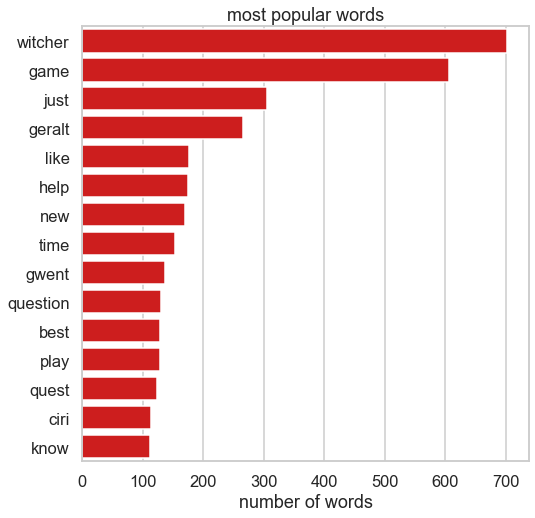

In [44]:
# WTICHER3- most common words
plt.figure(figsize=(8,8))
plt.title('most popular words')
plt.xlabel('number of words')
sns.barplot(x= witcher3_words_15.values, y= witcher3_words_15.index, color= (205/255, 30/255, 30/255, 1), saturation= 1);

In [45]:
# NETFLIXWITCHER
cv= CountVectorizer(stop_words= 'english', min_df= 2)
cv.fit(netflixwitcher_5000['title'])
netflixwitcher_cv = cv.transform(netflixwitcher_5000['title'])

netflixwitcher_words = pd.DataFrame(netflixwitcher_cv.todense(), columns=cv.get_feature_names())
netflixwitcher_words_15= netflixwitcher_words.sum().sort_values(ascending= False).head(15)
netflixwitcher_words_15

witcher     1316
season      1123
netflix      417
geralt       342
new          267
henry        207
like         191
ciri         180
just         160
s2           159
spoilers     153
yennefer     151
cavill       150
episode      138
wolf         138
dtype: int64

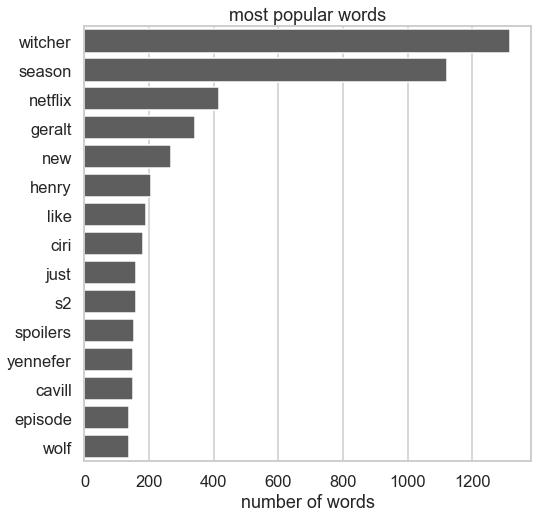

In [46]:
# NETFLIXWTICHER- most common words
plt.figure(figsize=(8,8))
plt.xlabel('number of words')
plt.title('most popular words')
sns.barplot(x= netflixwitcher_words_15.values, y= netflixwitcher_words_15.index, color= (94/255, 94/255, 94/255, 0.8), saturation= 1);

In [47]:
# WTICHER3- most common two-word phrases
cv_bigram = CountVectorizer(ngram_range= (2,2), stop_words= 'english')
cv_bigram.fit(witcher3_5000['title'])
witcher3_cv_bigram = cv_bigram.transform(witcher3_5000['title'])

witcher3_two_words = pd.DataFrame(witcher3_cv_bigram .todense(), columns=cv_bigram.get_feature_names())
witcher3_two_words_15= witcher3_two_words.sum().sort_values(ascending= False).head(15).sort_values(ascending= False)
witcher3_two_words_15

new game           60
blood wine         57
death march        34
kaer morhen        32
need help          32
witcher gear       28
wild hunt          27
just finished      26
hearts stone       25
playing witcher    25
just started       24
new player         24
main story         22
just got           21
game time          20
dtype: int64

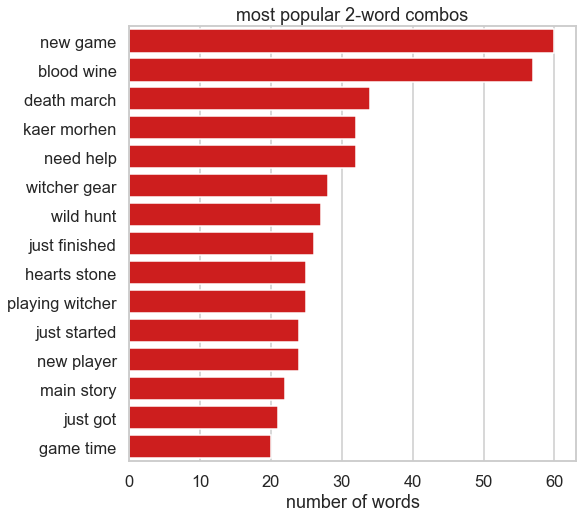

In [48]:
# WTICHER3- most common two-word phrases
plt.figure(figsize=(8,8))
plt.xlabel('number of words')
plt.title('most popular 2-word combos')
sns.barplot(x= witcher3_two_words_15.values, y= witcher3_two_words_15.index, 
            color= (205/255, 30/255, 30/255, 1), saturation= 1);

In [49]:
# NETFLIXWTICHER- most common two-word phrases
cv_bigram = CountVectorizer(ngram_range= (2,2), stop_words= 'english')
cv_bigram.fit(netflixwitcher_5000['title'])
netflixwitcher_cv_bigram = cv_bigram.transform(netflixwitcher_5000['title'])

netflixwitcher_two_words = pd.DataFrame(netflixwitcher_cv_bigram .todense(), columns=cv_bigram.get_feature_names())
netflixwitcher_two_words_15= netflixwitcher_two_words.sum().sort_values(ascending= False).head(15)
netflixwitcher_two_words_15

witcher season           285
henry cavill             139
blood origin              95
nightmare wolf            95
netflix witcher           74
witcher blood             59
toss coin                 57
redanian intelligence     54
kaer morhen               46
season countdown          39
coin witcher              38
book spoilers             38
geralt rivia              38
witcher netflix           38
link comments             37
dtype: int64

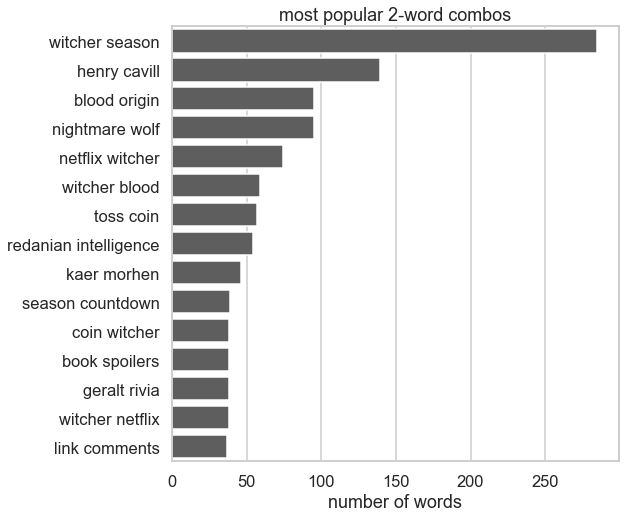

In [50]:
# NETFLIXWTICHER- most common two-word phrases
plt.figure(figsize=(8,8))
plt.xlabel('number of words')
plt.title('most popular 2-word combos')
sns.barplot(x= netflixwitcher_two_words_15.values, y= netflixwitcher_two_words_15.index, color= (94/255, 94/255, 94/255, 0.8), saturation= 1);

In [51]:
# WITCHER3- most common three-word phrases
cv_trigram = CountVectorizer(ngram_range= (3,3), stop_words= 'english')
cv_trigram.fit(witcher3_5000['title'])
witcher3_cv_trigram = cv_trigram.transform(witcher3_5000['title'])

witcher3_three_words = pd.DataFrame(witcher3_cv_trigram .todense(), columns=cv_trigram.get_feature_names())
witcher3_three_words_15= witcher3_three_words.sum().sort_values(ascending= False).head(15)
witcher3_three_words_15

new game plus           18
witcher wild hunt       12
battle kaer morhen       9
game year edition        8
blood wine dlc           7
just finished game       7
wolf school gear         6
ending main game         6
got bad ending           6
poll favorite ending     6
iris von everec          6
just started playing     6
happy new year           6
blood broken bones       6
start new game           6
dtype: int64

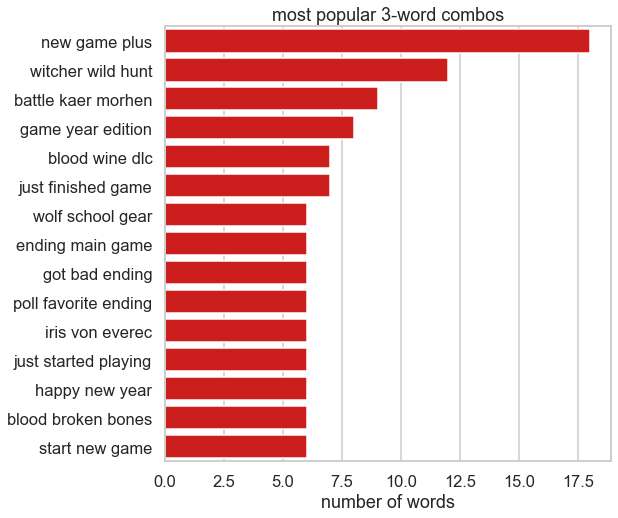

In [52]:
# WITCHER3- most common three-word phrases
plt.figure(figsize=(8,8))
plt.xlabel('number of words')
plt.title('most popular 3-word combos')
sns.barplot(x= witcher3_three_words_15.values, y= witcher3_three_words_15.index, 
            color= (205/255, 30/255, 30/255, 1), saturation= 1);

In [53]:
# NETFLIXWTICHER- most common three-word phrases
cv_trigram = CountVectorizer(ngram_range= (3,3), stop_words= 'english')
cv_trigram.fit(netflixwitcher_5000['title'])
netflixwitcher_cv_trigram= cv_trigram.transform(netflixwitcher_5000['title'])

netflixwitcher_three_words= pd.DataFrame(netflixwitcher_cv_trigram .todense(), columns=cv_trigram.get_feature_names())
netflixwitcher_three_words_15= netflixwitcher_three_words.sum().sort_values(ascending= False).head(15)
netflixwitcher_three_words_15

witcher blood origin         58
toss coin witcher            38
favorite scene poll          31
poll link comments           31
scene poll link              31
witcher nightmare wolf       30
witcher season premiere      18
burn butcher burn            17
days witcher airs            14
hope guys enjoy              13
sonya belousova giona        10
belousova giona ostinelli    10
book spoilers discussion      9
witcher season release        9
bracket favorite scene        9
dtype: int64

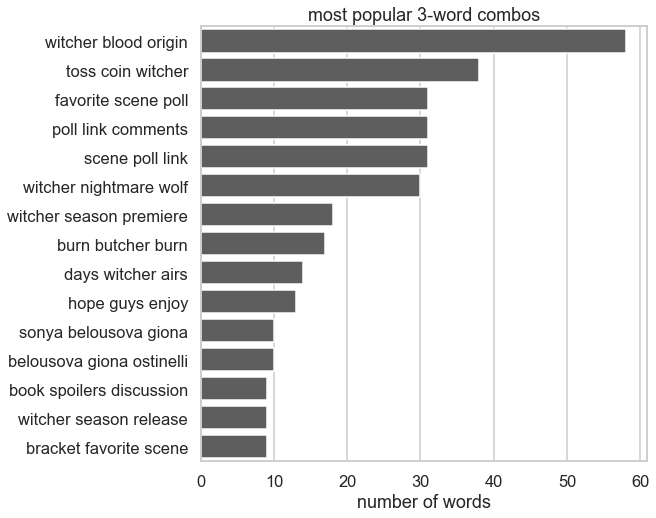

In [54]:
plt.figure(figsize=(8,8))
plt.xlabel('number of words')
plt.title('most popular 3-word combos')
sns.barplot(x= netflixwitcher_three_words_15.values, y= netflixwitcher_three_words_15.index, color= (94/255, 94/255, 94/255, 0.8), saturation= 1);